Predicting Real Estate House Prices

In [48]:

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [49]:
# Read the csv data into a pandas dataframe and display the first 5 samples
data = pd.read_csv('Real_estate.csv')
print(data)

      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 3

In [50]:
#Show more information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None


In [51]:
#Find how many samples are there and how many columns are there in the dataset
print(f"Number of samples: {len(data)}, Number of columns: {len(data.columns)}")

Number of samples: 414, Number of columns: 8


In [52]:
#What are the features available in the dataset?
print("Features available in the dataset:", data.columns)

Features available in the dataset: Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


In [53]:
#Check if any features have missing data
print("Features with missing data:", data.isnull().sum())

Features with missing data: No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


In [54]:
#Group all the features as dependent features in X
X = data.drop('Y house price of unit area', axis=1)
print(X)

      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 3

In [55]:
#Group feature(s) as independent features in y
y = data['Y house price of unit area']
print(y)

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64


In [56]:
#Split the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [57]:
#Choose the model (Linear Regression)
model = LinearRegression()

In [58]:
#Create an Estimator object
estimator = model.fit(X_train, y_train)

In [59]:
#Train the model
estimator.fit(X_train, y_train)

LinearRegression()

In [60]:
#Apply the model
y_pred = estimator.predict(X_test)
print(y_pred )

[34.59222454 47.58673483 20.9226481  12.49402832 43.11887361 34.53739706
 30.94528506 45.32577595 38.04839075 13.90217198 11.89791644 38.52611287
 31.88063097 45.37604685 50.84658168 36.2862735  44.41072387 45.22203001
 30.05273304 43.75888331 51.29456053 28.42367787 40.02214039 46.83612492
 45.84974629 27.92864195 31.22197429 47.76028543 46.28854703 15.07952064
 33.75569025 34.83403033 42.32056056 44.63278564 48.22580741 12.97087505
 41.19586968 41.23713034 38.99845431 13.34108478 39.17706813 24.42380144
 54.59173411 36.60841823 34.90462826 38.87349258 30.70013923 39.54325265
 45.86276573 34.25812241 11.34870326 44.60912585 44.90742037 13.80958428
 49.00623946 42.27434654 44.23307525 39.39850242 38.07681462 39.67756938
 25.07802274 40.22903165 35.23138718 12.73839662 40.28227559 45.09055924
 39.4620461  47.19403621 14.23920405 40.31613727 47.66924523  9.00973503
 33.91652204 39.4240646  49.3609924  37.78230244 35.74899709 38.3323727
 40.84208554 48.13291437 45.74858646 41.06978899 45.

In [61]:
#Display the coefficients
print("Coefficients:", estimator.coef_)

Coefficients: [-1.09659640e-03  5.69815368e+00 -2.49757004e-01 -4.94908683e-03
  1.07369954e+00  2.26802763e+02 -3.62816002e+01]


In [63]:
#Find how well the trained model did with testing data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Squared Error:", r2)

Mean Squared Error: 44.5948823950111
Mean Squared Error: 0.7061990777416614


<Axes: xlabel='X1 transaction date', ylabel='Y house price of unit area'>

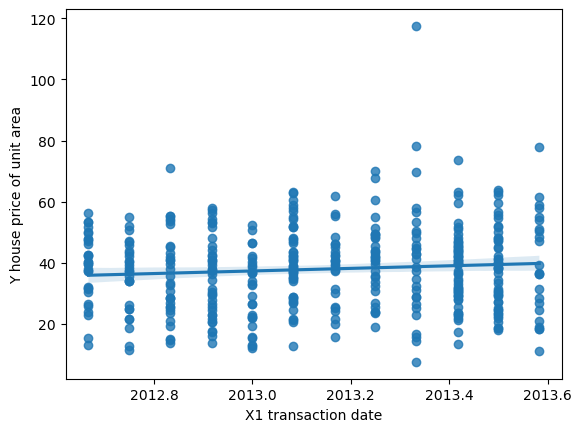

In [66]:
#Plot House Age Vs Price
Plot= sns.regplot(x='X1 transaction date', y='Y house price of unit area', data=data)
Plot

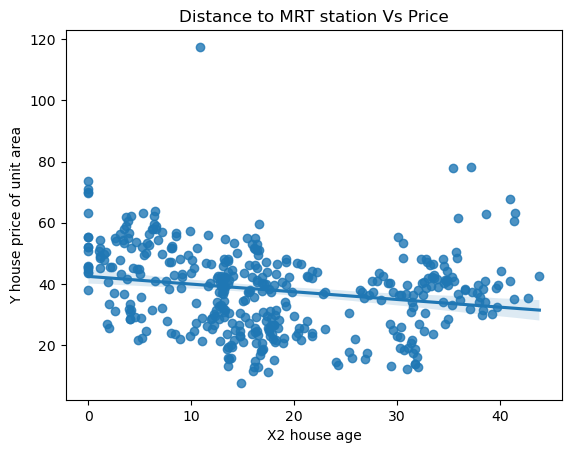

In [29]:
#Plot Distance to MRT station Vs Price
sns.regplot(x='X2 house age', y='Y house price of unit area', data=data)
plt.title('Distance to MRT station Vs Price')
plt.show()

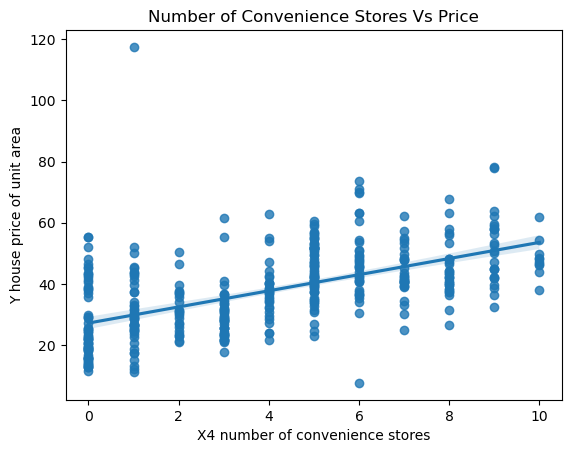

In [30]:
#Plot Number of Convienience Stores Vs Price
sns.regplot(x='X4 number of convenience stores', y='Y house price of unit area', data=data)
plt.title('Number of Convenience Stores Vs Price')
plt.show()